# Całkowanie Monte Carlo 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

Zdefiniujmy funkcję, którą będziemy całkować

In [2]:
def f(x):
    return np.exp(x)

Losujemy punkty z kwadratu 

$$
[a,b] \times [0, max_{x \in [a,b]}\{f(x)\}]
$$

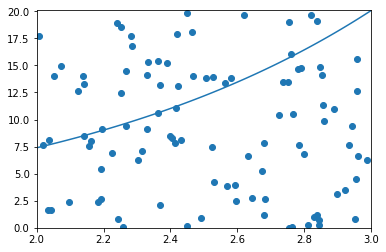

In [3]:
n=100
a=2
b=3
x = np.linspace(a, b, n)
y = f(x)
ymin=0
ymax=np.max(y)
pts = np.column_stack((stats.uniform(a,b-a).rvs(n),stats.uniform(ymin,ymax).rvs(n)))
plt.plot(x, y);
plt.scatter(pts[:, 0], pts[:, 1])
plt.xlim([a,b])
plt.ylim([ymin, ymax]);
plt.show()

$$
I = \int_{a}^b \psi(x) dx. 
$$

Niech $X_1, \ldots, X_n$ będzie ciągiem niezalizanych zmiennych losowych o rozkładzie jednostajnym na odcinku $[0,1]$, wtedy 

$$
\hat I_n = \frac{1}{n} \sum \psi(X_i)
$$

jest estymatorem nieobciążonym $I$.


# Zadanie
Policz całkę z funkcji $f$ za pomocą powyższego nieobciążonego estymatora na przedziale $[a,b]$ dla różnych wielkości próbek.

In [5]:
for n in 10**np.array([1,2,3,4,5,6,7]):
    pts = stats.uniform(a, b-a).rvs(n)
    sol=np.mean(f(pts))
    print('%10d %.6f' % (n, sol))

        10 12.628758
       100 13.017305
      1000 12.715977
     10000 12.643105
    100000 12.682835
   1000000 12.687387
  10000000 12.695584


## Możesz sprawdzić z wynikiem całkowania numerycznego

In [6]:
from scipy import integrate
integrate.quad(f, a, b)

(12.69648082425702, 1.4095925342801928e-13)